# Punctuation
raw prompts without spell correction or expansions

In [15]:
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from helpers.occurences import count_occurrences, count_punctuation
from helpers.stats import run_t_test_on_gender

db_path = "../../giicg.db"
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file does not exist: {db_path}")

conn = sqlite3.connect(db_path)
prompts = pd.read_sql("SELECT * FROM main.filtered_prompts", conn)
prompts = prompts.dropna(subset=['conversational'])
prompts = prompts[prompts['conversational'].str.strip() != '']
prompts = prompts.dropna(subset=['conversational'])
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,Transform given code to process large .mbox file,Man (cisgender),6
...,...,...,...,...,...,...,...,...,...
755,1646,82,user,"def run_query(query, n_results):\n query_em...",this is my code. I want to: Get nodes and edge...,"def run_query(query, n_results):\n query_em...",,Man (cisgender),92
756,1845,37,user,\n nun möchte ich judgement balancing m...,\n nun möchte ich judgement balancing m...,,,Woman (cisgender),29
757,1847,37,user,\n ich sehe keine veränderung im Plot. Was ...,\n ich sehe keine veränderung im Plot. Was ...,,,Woman (cisgender),29
758,1849,2,user,\n I am working on the problem of reconstru...,\n I am working on the problem of reconstru...,,Classic CV - Drone navigation\nIf you ever tho...,Man (cisgender),8


## Combine prompts per user

In [16]:
user_prompts = (
    prompts.groupby(['user_id', 'gender'])['conversational']
    .apply(' '.join)
    .reset_index()
)

## Count punctuation occurences

In [17]:
from helpers.occurences import divide_counts

user_prompts['punctuation_counts'] = user_prompts['conversational'].apply(lambda x: count_punctuation(x))
user_prompts['n_words'] = user_prompts['conversational'].apply(lambda x: len(x.split()))
user_prompts['normalized_counts'] = user_prompts.apply(lambda row: divide_counts(row['punctuation_counts'], row['n_words']), axis=1)


In [18]:
user_prompts

,user_id,gender,conversational,punctuation_counts,n_words,normalized_counts
0,6,Man (cisgender),"parsing data from python iterator, how it coul...","{',': 2, ':': 5, ' ': 14, '.': 7, '-': 2, '(':...",196,"{',': 0.01020408163265306, ':': 0.025510204081..."
1,8,Man (cisgender),\n I am working on the problem of reconstru...,"{' ': 2, '.': 3}",36,"{' ': 0.05555555555555555, '.': 0.083333333333..."
2,11,Woman (cisgender),Can you adapt the following code so that inste...,"{'?': 10, ',': 2, ':': 3, '-': 3, '""': 4}",193,"{'?': 0.05181347150259067, ',': 0.010362694300..."
3,15,Man (cisgender),SET_ALL_TABLES action is currently not fetchin...,"{',': 2, '?': 2}",36,"{',': 0.05555555555555555, '?': 0.055555555555..."
4,16,Woman (cisgender),I want to use Dummy Hot encoding to replace th...,"{''': 24, ':': 10, ' ': 8, ',': 18, '?': 9, '""...",542,"{''': 0.04428044280442804, ':': 0.018450184501..."
5,25,Man (cisgender),whats the best way to encode and compress a ja...,"{',': 2, '-': 1, '?': 2, '.': 3}",107,"{',': 0.018691588785046728, '-': 0.00934579439..."
6,28,Woman (cisgender),I have a pandas dataframe like this:\n\nI want...,"{':': 7, ' ': 11, ',': 31, '?': 10, '!': 2, '""...",561,"{':': 0.012477718360071301, ' ': 0.01960784313..."
7,29,Woman (cisgender),\n nun möchte ich judgement balancing m...,"{' ': 4, '.': 3, ',': 1, '""': 2, '?': 2}",64,"{' ': 0.0625, '.': 0.046875, ',': 0.015625, '""..."
8,30,Non-binary,"as a NLP and LLM researcher, I am recently dow...","{',': 2, '.': 3, ' ': 2}",92,"{',': 0.021739130434782608, '.': 0.03260869565..."
9,31,Man (cisgender),How can I make use of an ObservableHQDatabaseC...,"{'(': 1, ')': 1, '?': 5, ' ': 2, '.': 1, ',': ...",92,"{'(': 0.010869565217391304, ')': 0.01086956521..."


## Fuse counts per gender

In [19]:
normalized_df = pd.json_normalize(user_prompts['normalized_counts'])
normalized_df['gender'] = user_prompts['gender']
normalized_df['user_id'] = user_prompts['user_id']

gender_means = normalized_df.groupby('gender').mean(numeric_only=True).dropna(axis=1, how='all')

In [13]:
gender_means

,",",:,\n,.,-,(,),?,"""",',[,],!,;,user_id
gender,,,,,,,,,,,,,,,
Another gender,0.027778,0.015873,0.007937,0.067460,NaN,0.003968,0.003968,0.015873,0.007937,NaN,NaN,NaN,NaN,NaN,84.000000
Man (cisgender),0.025079,0.017550,0.032339,0.049514,0.017965,0.007876,0.007712,0.029169,0.032050,0.013249,0.000770,0.000770,0.006612,0.001141,52.000000
Non-binary,0.021739,NaN,0.021739,0.032609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
Woman (cisgender),0.018745,0.012862,0.024984,0.026326,0.007921,0.004659,0.004721,0.031857,0.017374,0.012195,0.001845,0.001845,0.002095,0.000313,54.307692


## Plot (including zeros)

,:
  T-statistic: 0.7028, p-value: 0.4885
  Female: n=13, variance=0.0002
  Male:   n=15, variance=0.0004
::
  T-statistic: -0.5654, p-value: 0.5769
  Female: n=13, variance=0.0001
  Male:   n=15, variance=0.0001

:
  T-statistic: 0.4993, p-value: 0.6218
  Female: n=13, variance=0.0004
  Male:   n=15, variance=0.0006
.:
  T-statistic: 2.0284, p-value: 0.0557
  Female: n=13, variance=0.0003
  Male:   n=15, variance=0.0012
-:
  T-statistic: 2.6424, p-value: 0.0161
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0001
(:
  T-statistic: 1.2875, p-value: 0.2106
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
):
  T-statistic: 1.2221, p-value: 0.2338
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
?:
  T-statistic: -0.9071, p-value: 0.3727
  Female: n=13, variance=0.0003
  Male:   n=15, variance=0.0004
":
  T-statistic: -0.3561, p-value: 0.7251
  Female: n=13, variance=0.0001
  Male:   n=15, variance=0.0003
':
  T-statistic: -0.3162, p-value: 0.7550


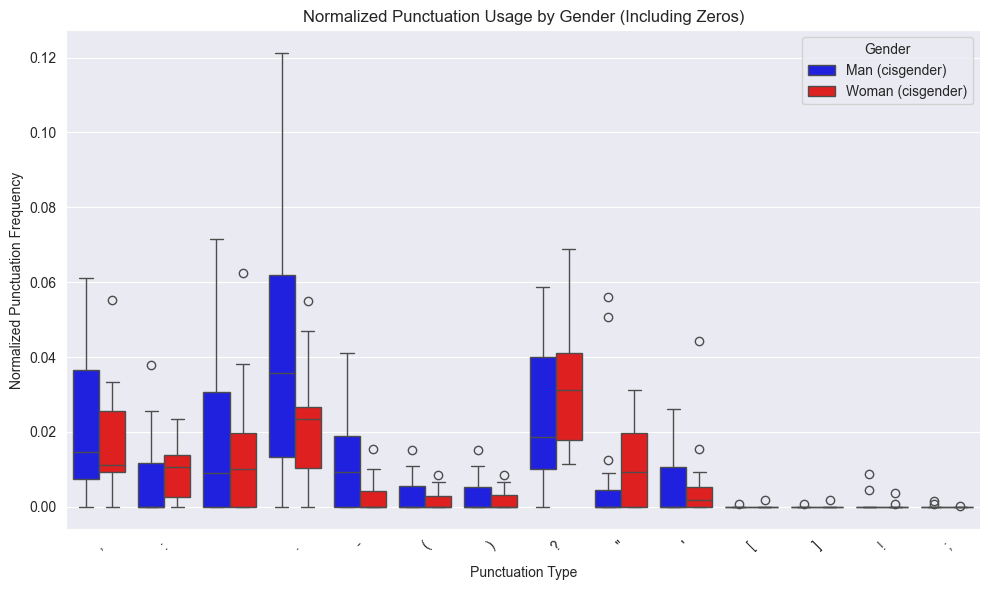

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_9744/3476390866.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


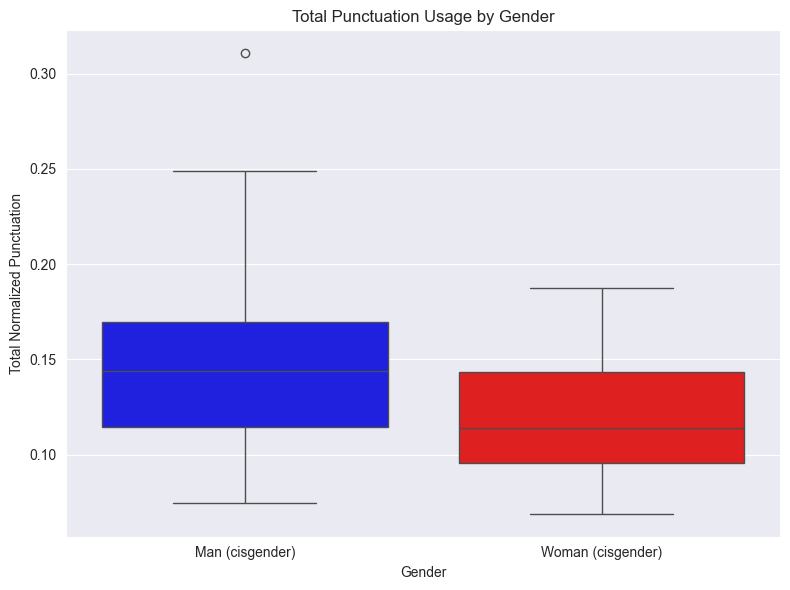

In [24]:
# Let's assume you have user_prompts and punctuation_cols as in your analysis
# Keep zeros (do not replace with NaN) before melting

included = normalized_df[normalized_df['gender'].isin(['Woman (cisgender)', 'Man (cisgender)'])].reset_index(drop=True)
included = included.fillna(0)  # <-- This is key: replace NaN with 0 for all users who had no such punctuation

punctuation_cols = [col for col in included.columns if col not in ['gender', 'user_id']]

for col in punctuation_cols:
    run_t_test_on_gender(included, col)

included['total_punctuation'] = included[punctuation_cols].sum(axis=1)
gender_total_mean = included.groupby('gender')['total_punctuation'].mean()
print("Gender totals:\n", gender_total_mean)
run_t_test_on_gender(included, 'total_punctuation')

# Melt for plotting
melted_including_zeros = included.melt(
    id_vars=['gender', 'user_id'],
    value_vars=punctuation_cols,
    var_name='punctuation_type',
    value_name='normalized_count'
)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=melted_including_zeros,
    x='punctuation_type',
    y='normalized_count',
    hue='gender',
    palette={'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'}
)
plt.title("Normalized Punctuation Usage by Gender (Including Zeros)")
plt.ylabel("Normalized Punctuation Frequency")
plt.xlabel("Punctuation Type")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=included,
    x='gender',
    y='total_punctuation',
    palette={'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'}
)
plt.title('Total Punctuation Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Normalized Punctuation')
plt.tight_layout()
plt.show()

## Plot (excluding zeros)

,:
  T-statistic: 0.9695, p-value: 0.3427
  Female: n=12, variance=0.0002
  Male:   n=13, variance=0.0004
::
  T-statistic: 0.8221, p-value: 0.4342
  Female: n=10, variance=0.0000
  Male:   n=7, variance=0.0001

:
  T-statistic: 0.7364, p-value: 0.4730
  Female: n=8, variance=0.0003
  Male:   n=9, variance=0.0005
.:
  T-statistic: 2.2914, p-value: 0.0349
  Female: n=11, variance=0.0002
  Male:   n=13, variance=0.0010
-:
  T-statistic: 2.5469, p-value: 0.0244
  Female: n=5, variance=0.0000
  Male:   n=10, variance=0.0001
(:
  T-statistic: 1.6975, p-value: 0.1205
  Female: n=5, variance=0.0000
  Male:   n=7, variance=0.0000
):
  T-statistic: 1.5585, p-value: 0.1502
  Female: n=5, variance=0.0000
  Male:   n=7, variance=0.0000
?:
  T-statistic: -0.3584, p-value: 0.7232
  Female: n=13, variance=0.0003
  Male:   n=13, variance=0.0004
":
  T-statistic: 1.1771, p-value: 0.3164
  Female: n=8, variance=0.0001
  Male:   n=4, variance=0.0006
':
  T-statistic: 0.1627, p-value: 0.8742
  Female: n=7

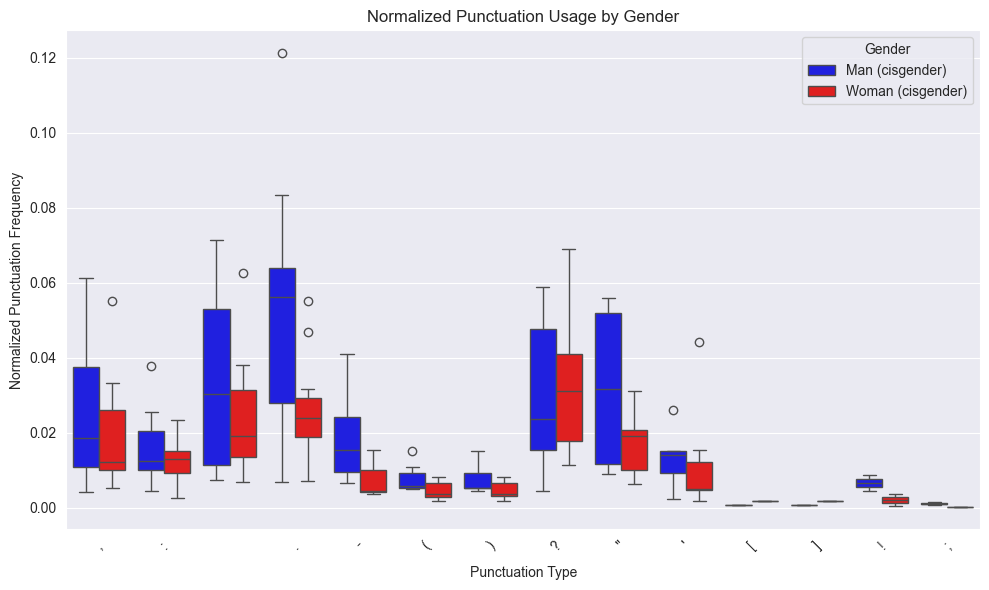

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_9744/2278265466.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


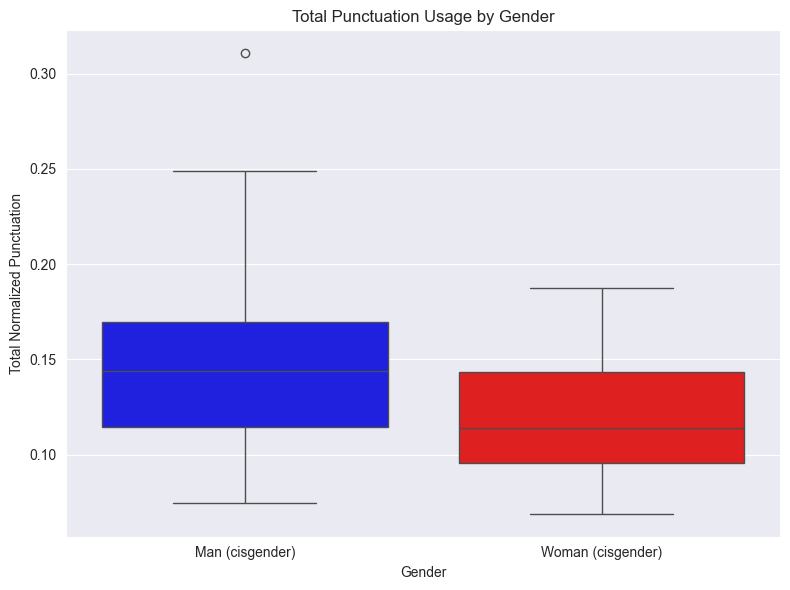

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
from helpers.stats import run_t_test_on_gender

filtered = normalized_df[normalized_df['gender'].isin(['Woman (cisgender)', 'Man (cisgender)'])].reset_index(drop=True)
filtered = filtered.dropna(axis=1, how='all')
punctuation_cols = [col for col in filtered.columns if col not in ['gender', 'user_id']]

for col in punctuation_cols:
    run_t_test_on_gender(filtered, col)

filtered['total_punctuation'] = filtered[punctuation_cols].sum(axis=1)
gender_total_mean = filtered.groupby('gender')['total_punctuation'].mean()
print("Gender totals:\n", gender_total_mean)
run_t_test_on_gender(filtered, 'total_punctuation')

melted = filtered.melt(
    id_vars=['gender', 'user_id'],
    value_vars=punctuation_cols,
    var_name='punctuation_type',
    value_name='normalized_count'
)

plt.figure(figsize=(10,6))
sns.boxplot(
    data=melted,
    x='punctuation_type',
    y='normalized_count',
    hue='gender',
    palette={'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'}
)
plt.title("Normalized Punctuation Usage by Gender")
plt.ylabel("Normalized Punctuation Frequency")
plt.xlabel("Punctuation Type")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=filtered,
    x='gender',
    y='total_punctuation',
    palette={'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'}
)
plt.title('Total Punctuation Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Normalized Punctuation')
plt.tight_layout()
plt.show()

